# Part 2 : Looking at Data for the first time
- Cleaning Data
- Visulizing some simple trends to get a good overview of data.

# Background Research
- Looking at potential csv data
- Looking at various trends based using visualization
- Using this information to formulate a concrete research question

In [14]:
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


grades = pandas.read_csv('Data/fall-grade-distribution2018-2022.csv')
grades

,Academic Year,Term,Subject,Course No.,Course Title,Instructor,GPA,A (%),A- (%),B+ (%),...,C (%),C- (%),D+ (%),D (%),D- (%),F (%),Withdraws,Graded Enrollment,CRN,Credits
0,2018-19,Fall,PPWS,5214,Diseases of Crop Plants,Baudoin,3.48,20.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,87666,1
1,2018-19,Fall,ALS,2974,IS: Meat Science Lab,Gerrard,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,90008,1
2,2018-19,Fall,AT,974,IS: Business Prof Development,Guthrie,3.28,0.0,40.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,91146,1
3,2018-19,Fall,UAP,5424,TS: Site Planning,Beske,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,90981,1
4,2018-19,Fall,AOE,4254,Ocean Engineering Laboratory,Alexander,3.34,40.0,20.0,20.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0,5,80350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17648,2019-20,Fall,ITDS,1114,Design Appreciation,Tew,3.94,94.6,1.3,1.2,...,0.2,0.3,0.1,0.0,0.1,0.3,5,1015,85780,3
17649,2018-19,Fall,GEOG,1014,World Regions,Boyer,3.63,75.9,6.8,1.8,...,1.5,1.5,0.5,0.6,0.0,3.6,114,1298,84677,3
17650,2019-20,Fall,GEOG,1014,World Regions,Boyer,3.67,80.7,5.3,1.5,...,1.7,0.9,0.5,0.8,0.0,3.9,77,1333,84864,3
17651,2020-21,Fall,ITDS,1114,Design Appreciation,Tew,3.79,82.3,4.2,3.9,...,0.9,0.4,0.3,0.5,0.2,0.9,5,4036,86220,3


**Displaying All GPA data**

This displays all of the average GPA values for each class, color coded by cource number

We can see that this chart is very dence and is hard to read. However it does reveal a few things.
 - The first thing we can notice is that there is a smaller distribution of grades as the the level goes up (leves refer to 1000, 2000, 3000, etc).
 - Also as classes levels increace we can see that the average GPA is much higher.
 - We can also see the dencity of data points decreaces as the x-axis increaces (with the exeption of classes less than 1000)

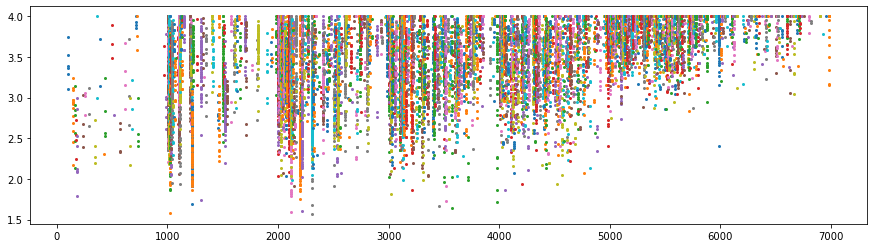

In [2]:

groups = grades.groupby('Course No.')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
for name, group in groups:
    plt.plot(group["Course No."], group["GPA"], marker='o', linestyle='', markersize=2, label=name)

**Lets try to get some more readable data out of the set**

Here we are looking at the averages of all the GPA in cource number catagories. 

We plot these averages out over a 4 years

There is a lot that can be observed here.

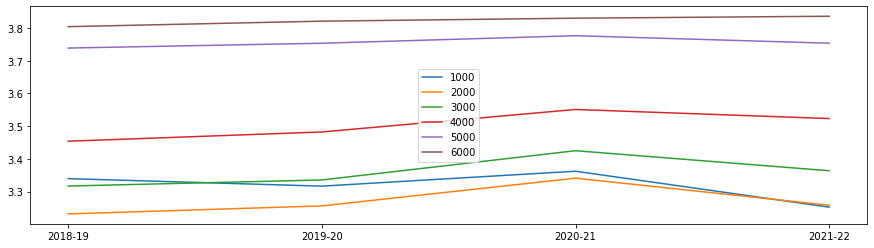

In [3]:

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)

# Groups ever 1***, 2****, 3****, etc classes together
for i in range (1,7):
    
    start = i * 1000
    end = (i + 1) * 1000
    
    level_df = grades.loc[grades['Course No.'] >= start] 
    level_df = level_df.loc[grades['Course No.'] < end]
    
    # groups the years together and finds the averages from each of the 4 years
    sub_groups = level_df.groupby('Academic Year')
    
    means =[]
    years = []

    for sub_name, sub_group in sub_groups:
        gpa_averages = sub_group["GPA"].mean()
        means.append(gpa_averages)
        years.append(sub_name)

    # Plots all averages for each year
    plt.plot(years, means, linestyle='solid', markersize=2, label=start)

plt.legend()

**In depth look at 3 difficult classes and there grades over time**

There is a lot of interesting things happening in this chart

We can add more notoriously difficult classes too.

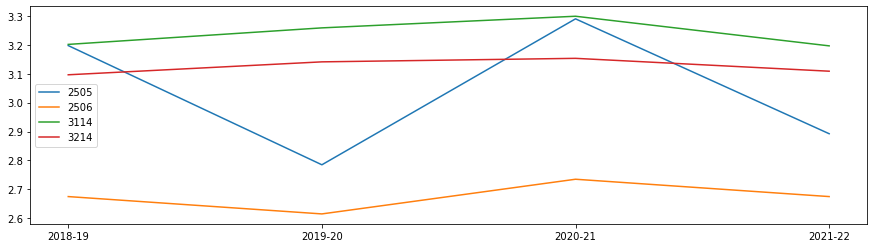

In [4]:

groups = grades.groupby('Course No.')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
for name, group in groups:
    if name in [3214, 2505, 2506,3114]:
        sub_groups = group.groupby('Academic Year')

        means =[]
        years = []
        
        for sub_name, sub_group in sub_groups:
            gpa_averages = sub_group["GPA"].mean()
            means.append(gpa_averages)
            years.append(sub_name)
        plt.plot(years, means, linestyle='solid', markersize=2, label=name)

plt.legend()

**Some other Ideas to look at**
- Average GPA for each proffesor (could be a bar graph)
- Grade distribution from year to year
- Look at a single year and graph different professors average GPA
- Maybe a box plot of grades too

# Research Question 1 : 
# Are there signs of grade inflation at Virginia Tech?

###  Motivation
Grade inflation is an undeniable reality of the US educational system. Over the past couple of decades, GPA for the same courses in bachelor level degrees have risen. 

## Figure 1
![Image of GPA Inflation for Public and Private Schools](https://www.gradeinflation.com/figure1.png)

#### Source: https://www.gradeinflation.com/

## Figure 2
![Image of GPA Inflation for Public and Private Schools](https://www.gradeinflation.com/figure2.png)
#### Source: https://www.gradeinflation.com/

### Hypothesis
There is grade inflation in the CS department at Virginia Tech

### Procedure
1. Get CSV data for grade distribution of classes(Fall and Spring) at VT from 2012 to 2022 
2. Plot the trend of A's B's and C's for the respective classes (2505, 2506, 3114, 3214)
3. Form a conclusion based on the data and visualizations

#### Step 1: Obtaining the Data

In [68]:
All_Grades_Since2012 = pandas.read_csv('Data/All_Grade_Distributions.csv')
df = All_Grades_Since2012.groupby(["Academic Year", "Term","Subject","Course No." ])['GPA',
 'A (%)',
 'A- (%)',
 'B+ (%)',
 'B (%)',
 'B- (%)',
 'C+ (%)',
 'C (%)',
 'C- (%)',
 'D+ (%)',
 'D (%)',
 'D- (%)',
 'F (%)'].mean()
df

/var/folders/ts/vlzc1j4x6210qt71m_08g62r0000gn/T/ipykernel_10533/2655820809.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = All_Grades_Since2012.groupby(["Academic Year", "Term","Subject","Course No." ])['GPA',


GPA  A (%)  A- (%)  B+ (%)  \
Academic Year Term     Subject Course No.                                 
2012-13       Fall     AAEC    1005        2.490   15.7    7.55    6.85   
                               1006        2.820   12.2   15.60   15.60   
                               2104        3.390   54.8    0.00    0.00   
                               2434        2.780   10.7   10.70   10.70   
                               2464        2.705    2.4   16.45   19.40   
...                                          ...    ...     ...     ...   
2022-23       Summer I TA      3954        4.000  100.0    0.00    0.00   
                       UAP     3954        4.000  100.0    0.00    0.00   
                               5184        4.000  100.0    0.00    0.00   
                       WGS     1824        3.260   55.6   11.10   11.10   
                               2204        2.540   20.0   20.00    0.00   

                                           B (%)  B- (%)  C+ (%)  C (%)  \
Academic Year Term     Subject Course No.                                 
2012-13       Fall     AAEC    1005        17.30    5.90     9.1  13.15   
                               1006        16.30    9.50     6.8   6.10   
                               2104        33.70    0.00     0.0   8.40   
                               2434        19.60   16.10     7.1  12.50   
                               2464        13.85   17.85     9.1   0.80   
...                                          ...     ...     ...    ...   
2022-23       Summer I TA      3954         0.00    0.00     0.0   0.00   
                       UAP     3954         0.00    0.00     0.0   0.00   
                               5184         0.00    0.00     0.0   0.00   
                       WGS     1824         0.00    0.00    11.1   0.00   
                               2204         0.00   20.00    20.0   0.00   

                                           C- (%)  D+ (%)  D (%)  D- (%)  \
Academic Year Term     Subject Course No.                                  
2012-13       Fall     AAEC    1005          5.45     4.5    4.5     1.9   
                               1006          8.20     4.1    0.7     2.0   
                               2104          0.00     0.0    1.8     0.0   
                               2434          5.40     1.8    3.6     1.8   
                               2464          3.95    11.5    0.8     1.6   
...                                           ...     ...    ...     ...   
2022-23       Summer I TA      3954          0.00     0.0    0.0     0.0   
                       UAP     3954          0.00     0.0    0.0     0.0   
                               5184          0.00     0.0    0.0     0.0   
                       WGS     1824          0.00     0.0    0.0     0.0   
                               2204          0.00     0.0    0.0     0.0   

                                           F (%)  
Academic Year Term     Subject Course No.         
2012-13       Fall     AAEC    1005          8.2  
                               1006          2.7  
                               2104          1.2  
                               2434          0.0  
                               2464          2.4  
...                                          ...  
2022-23       Summer I TA      3954          0.0  
                       UAP     3954          0.0  
                               5184          0.0  
                       WGS     1824         11.1  
                               2204         20.0  

[47972 rows x 13 columns]

In [88]:
dfGPABySemester= df.groupby(["Academic Year" ])['GPA'].mean()

[3.400222246689536,
 3.406790168191051,
 3.4249639868011648,
 3.4272044391022405,
 3.439216213216608,
 3.461112398512782,
 3.464133766855185,
 3.556145105431358,
 3.530307572313066,
 3.482403706074579,
 3.409740591597571]

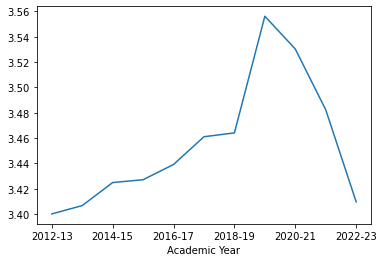

In [96]:
plt= dfGPABySemester.plot.line()

[2.73992487e-03 3.32750913e+00]


<AxesSubplot:xlabel='Academic Year,Term'>

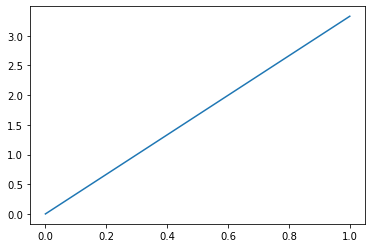

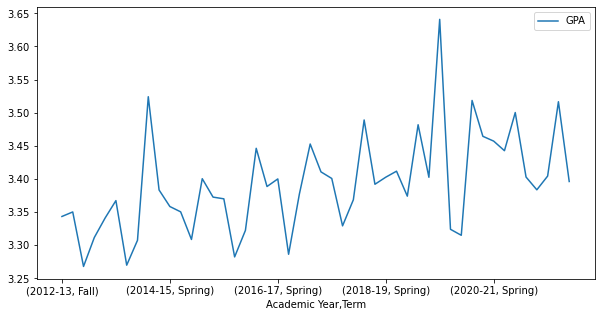

In [8]:
All_Grades_Since2012 = pandas.read_csv('Data/All_Grade_Distributions.csv')
groups_by_year = All_Grades_Since2012.groupby(['Academic Year', 'Term'])
yearly_avg_gpa = groups_by_year.aggregate({'GPA':numpy.mean})


z = numpy.polyfit(range(0, len(yearly_avg_gpa)), yearly_avg_gpa['GPA'], 1)
plt.plot(z)
print(z)
yearly_avg_gpa.plot(figsize=(10,5))

# yearly_avg_gpa

#### Step 2: Data Mining and Visualization

In [7]:
## code goes here

#### Step 3: Conclusion 

# Other Possible Research Questions

### 1. Comparing the average grades / highs and lows of College of Engineering (CS) vs College of Business (BIT)

##### Prereq: 
1. CSV data for CS classes from 2012 to 2022
2. CSV data for BIT classes from 2012 to 2022

##### Hypothesis: 
College of Business would have a higher grade average than the College of Engineering

##### Procedure: 
1. Obtain the data of classes
2. Plot the distribution of A, B, C and Ds for 4 core BIT classes (BIT 2405, BIT 2406, BIT 3414, BIT 3424)
3. Plot the distribution of A, B, C and Ds for 4 core CS classes (CS 2505, CS 2506, CS 3114, CS 3214)
4. Make a conclusion based on the visualization and data



### 2. Comparing the average grades / highs and lows of College of Engineering (CS) vs College of Science (BIT)

##### Prereq: 
1. CSV data for CS classes from 2012 to 2022
2. CSV data for BIT classes from 2012 to 2022

##### Hypothesis: 
College of Business would have a higher grade average than the College of Engineering

##### Procedure: 
1. Obtain the data of classes
2. Plot the distribution of A, B, C and Ds for 4 core BIT classes (BIT 2405, BIT 2406, BIT 3414, BIT 3424)
3. Plot the distribution of A, B, C and Ds for 4 core CS classes (CS 2505, CS 2506, CS 3114, CS 3214)
4. Make a conclusion based on the visualization and data



### 3. Comparing grades of the same CS class between different professors
Question specifics to be added in later parts of the project


# Major Changes to Team Specifics since Part 1

No Major changes to the Team Specifics or Contract
We will be working with our original dataset and gathering as many questions as possible regarding our topic. 

## Changes to Expect for Phase 3

1. Looking at multiple datasets, merging and comparing. 
2. Possible sources for other datasets: (grade distribution for other colleges, national grade distribution data, etc.)



# Part 2 Contributions

1. Henry Macht : Background Research w/ Visualizations and possible research questions
2. Prayash Joshi: Formulating Research Question 1, Data Collection 
3. Ivan Estay : Formulating Further Possible Research Questions
4. Matthew Grillo : Data Visualization for Research Question 1
5. Christopher Parker: ...